--- FASE 1: COMPILACIÓN ---
✅ Compilación exitosa.

--- FASE 2: EJECUCIÓN (C) ---
✅ Ejecución exitosa. Datos guardados en fractal_data.csv.

--- FASE 3: VISUALIZACIÓN (Python) ---
✅ Imagen guardada como 'fractal_final.png'


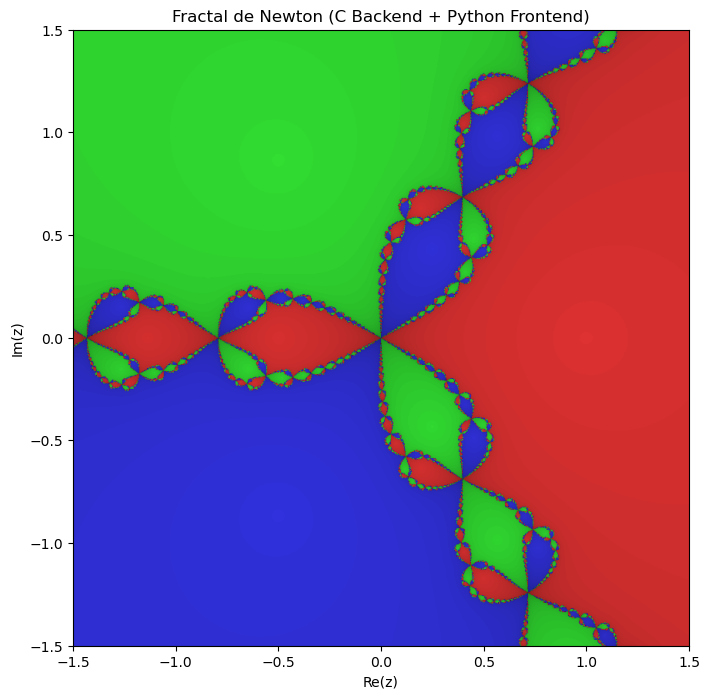

In [1]:
import subprocess
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- CONFIGURACIÓN ---
c_source = "fractal_Newton.c"
c_executable = "fractal_Newton"     # En Windows se creará fractal.exe automáticamente
csv_filename = "fractal_data.csv"

# Detectar si estamos en Windows para el nombre del ejecutable
if os.name == 'nt':
    c_executable += ".exe"
    run_cmd = c_executable
else:
    run_cmd = "./" + c_executable

def compile_and_run_c():
    print("--- FASE 1: COMPILACIÓN ---")
    # Comando de compilación: gcc fractal.c -o fractal -lm -O3
    compile_cmd = ["gcc", c_source, "-o", c_executable, "-lm", "-O3"]
    
    try:
        # Ejecuta el compilador
        subprocess.run(compile_cmd, check=True)
        print("✅ Compilación exitosa.")
    except subprocess.CalledProcessError:
        print("❌ Error al compilar el código C.")
        sys.exit(1) # Salir si falla
    except FileNotFoundError:
        print("❌ No se encontró 'gcc'. Asegúrate de tener un compilador de C instalado.")
        sys.exit(1)

    print("\n--- FASE 2: EJECUCIÓN (C) ---")
    try:
        # Ejecuta el binario generado
        subprocess.run([run_cmd], check=True)
        print(f"✅ Ejecución exitosa. Datos guardados en {csv_filename}.")
    except subprocess.CalledProcessError:
        print("❌ El programa en C falló durante la ejecución.")
        sys.exit(1)

def plot_data():
    print("\n--- FASE 3: VISUALIZACIÓN (Python) ---")
    
    if not os.path.exists(csv_filename):
        print(f"❌ Error: No se encuentra {csv_filename}")
        return

    # 1. Leer CSV
    # Asumimos que el C tiene definidos WIDTH y HEIGHT como 800
    # Si cambias el C, asegúrate de actualizarlo aquí o leerlo dinámicamente
    WIDTH, HEIGHT = 800, 800 
    MAX_ITER = 50
    
    df = pd.read_csv(csv_filename)
    roots = df['root_idx'].values.reshape((HEIGHT, WIDTH))
    iters = df['iterations'].values.reshape((HEIGHT, WIDTH))

    # 2. Lógica de Colores
    colors = np.zeros((HEIGHT, WIDTH, 3), dtype=float)
    palette = np.array([
        [0.9, 0.2, 0.2], # Rojo
        [0.2, 0.9, 0.2], # Verde
        [0.2, 0.2, 0.9]  # Azul
    ])

    mask = roots >= 0
    colors[mask] = palette[roots[mask]]

    # Brillo
    brightness = 1.0 - (iters / MAX_ITER) * 0.8
    brightness = np.clip(brightness, 0, 1)
    for c in range(3):
        colors[..., c] *= brightness
    colors[~mask] = 0.0

    # 3. Plot
    plt.figure(figsize=(8, 8))
    plt.imshow(colors, extent=[-1.5, 1.5, -1.5, 1.5], origin='lower')
    plt.title("Fractal de Newton (C Backend + Python Frontend)")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    
    # Opcional: Guardar la imagen automáticamente
    plt.savefig("fractal_final.png", dpi=300)
    print("✅ Imagen guardada como 'fractal_final.png'")
    
    plt.show()

if __name__ == "__main__":
    compile_and_run_c()
    plot_data()